In [110]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import copy

In [167]:
img = cv.imread('time.jpeg', 1)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kernel = [[0, 0, 1, 0, 0], 
          [0, 1, 1, 1, 0],
          [1, 1, -8, 1, 1],
          [0, 1, 1, 1, 0],
          [0, 0, 1, 0, 0]]
kernel = [[0, 1, 0],
          [1, -4, 1],
          [0, 1, 0]]

In [190]:
def convolution(img, kernel, padding_way):
    padding_size = len(kernel) // 2
    w_img = len(img[0])
    h_img = len(img)
    # padding the img
    if padding_way == 'ZERO':
        for row in img:
            for i in range(padding_size):
                row.insert(0, 0)
                row.append(0)
        first_line = [0 for i in range(w_img + 2*padding_size)]
        last_line = [0 for i in range(w_img + 2*padding_size)]
        for i in range(padding_size):
            img.insert(0, first_line)
            img.append(last_line)
    elif padding_way == 'REPLICA':
        for i in range(padding_size):
            img.insert(0, img[0])
            img.append(img[len(img) - 1])
        for row in img:
            for i in range(padding_size):
                row.insert(0, row[0])
                row.append(row[len(row) - 1])
    else:
        'only ZERO and REPLICA surported'
        
    target_img = copy.deepcopy(img)
    for row_i in range(padding_size, h_img + padding_size):
        for col_i in range(padding_size, w_img + padding_size):
            window_ =img[row_i - padding_size:row_i + padding_size + 1]
            window = [row[col_i - padding_size: col_i + padding_size + 1] for row in window_]
#             window = []
#             for row_full in window_:
#                 row = []
#                 for index in range(col_i - padding_size, col_i + padding_size + 1):
#                     row.append(row_full[index])
#                 window.append(row)
#             print('length of window:', len(window))
            # 卷积操作
            median = 0
            for i in range(len(kernel)):
                for j in range(len(kernel)):
                    median += window[i][j] * kernel[i][j]
#             print(row_i, col_i, median // len(kernel) ** 2)
            target_img[row_i][col_i] = median // len(kernel) ** 2
    return target_img

In [186]:
def medianBlur(img, kernel, padding_way):
    padding_size = len(kernel) // 2
    w_img = len(img[0])
    h_img = len(img)
    # padding the img
    if padding_way == 'ZERO':
        for row in img:
            for i in range(padding_size):
                row.insert(0, 0)
                row.append(0)
        first_line = [0 for i in range(w_img + 2*padding_size)]
        last_line = [0 for i in range(w_img + 2*padding_size)]
        for i in range(padding_size):
            img.insert(0, first_line)
            img.append(last_line)
    elif padding_way == 'REPLICA':
        for i in range(padding_size):
            img.insert(0, copy.deepcopy(img[0]))
            img.append(copy.deepcopy(img[len(img) - 1]))
        for row in img:
            for i in range(padding_size):
                row.insert(0, copy.deepcopy(row[0]))
                row.append(copy.deepcopy(row[len(row) - 1]))
#             print(row)
    else:
        'only ZERO and REPLICA surported'
        
    target_img = copy.deepcopy(img)
    for row_i in range(padding_size, h_img + padding_size):
        for col_i in range(padding_size, w_img + padding_size):
            window_ =img[row_i - padding_size:row_i + padding_size + 1]
            window = []
            for row in window_:
                window.extend(row[col_i - padding_size: col_i + padding_size + 1])
            window.sort()
#             print(window)
            target_img[row_i][col_i] = window[len(kernel) // 2]
    return target_img

In [191]:
img_medi1 = medianBlur(img_gray.tolist(), kernel, 'ZERO')
img_medi2 = medianBlur(img_gray.tolist(), kernel, 'REPLICA')
img_conv = convolution(img_gray.tolist(), kernel, 'ZERO')

In [192]:
print(img_gray.shape)
print('width: {}, height: {}'.format(len(img_medi[0]), len(img_medi)))

(399, 600)
width: 602, height: 401


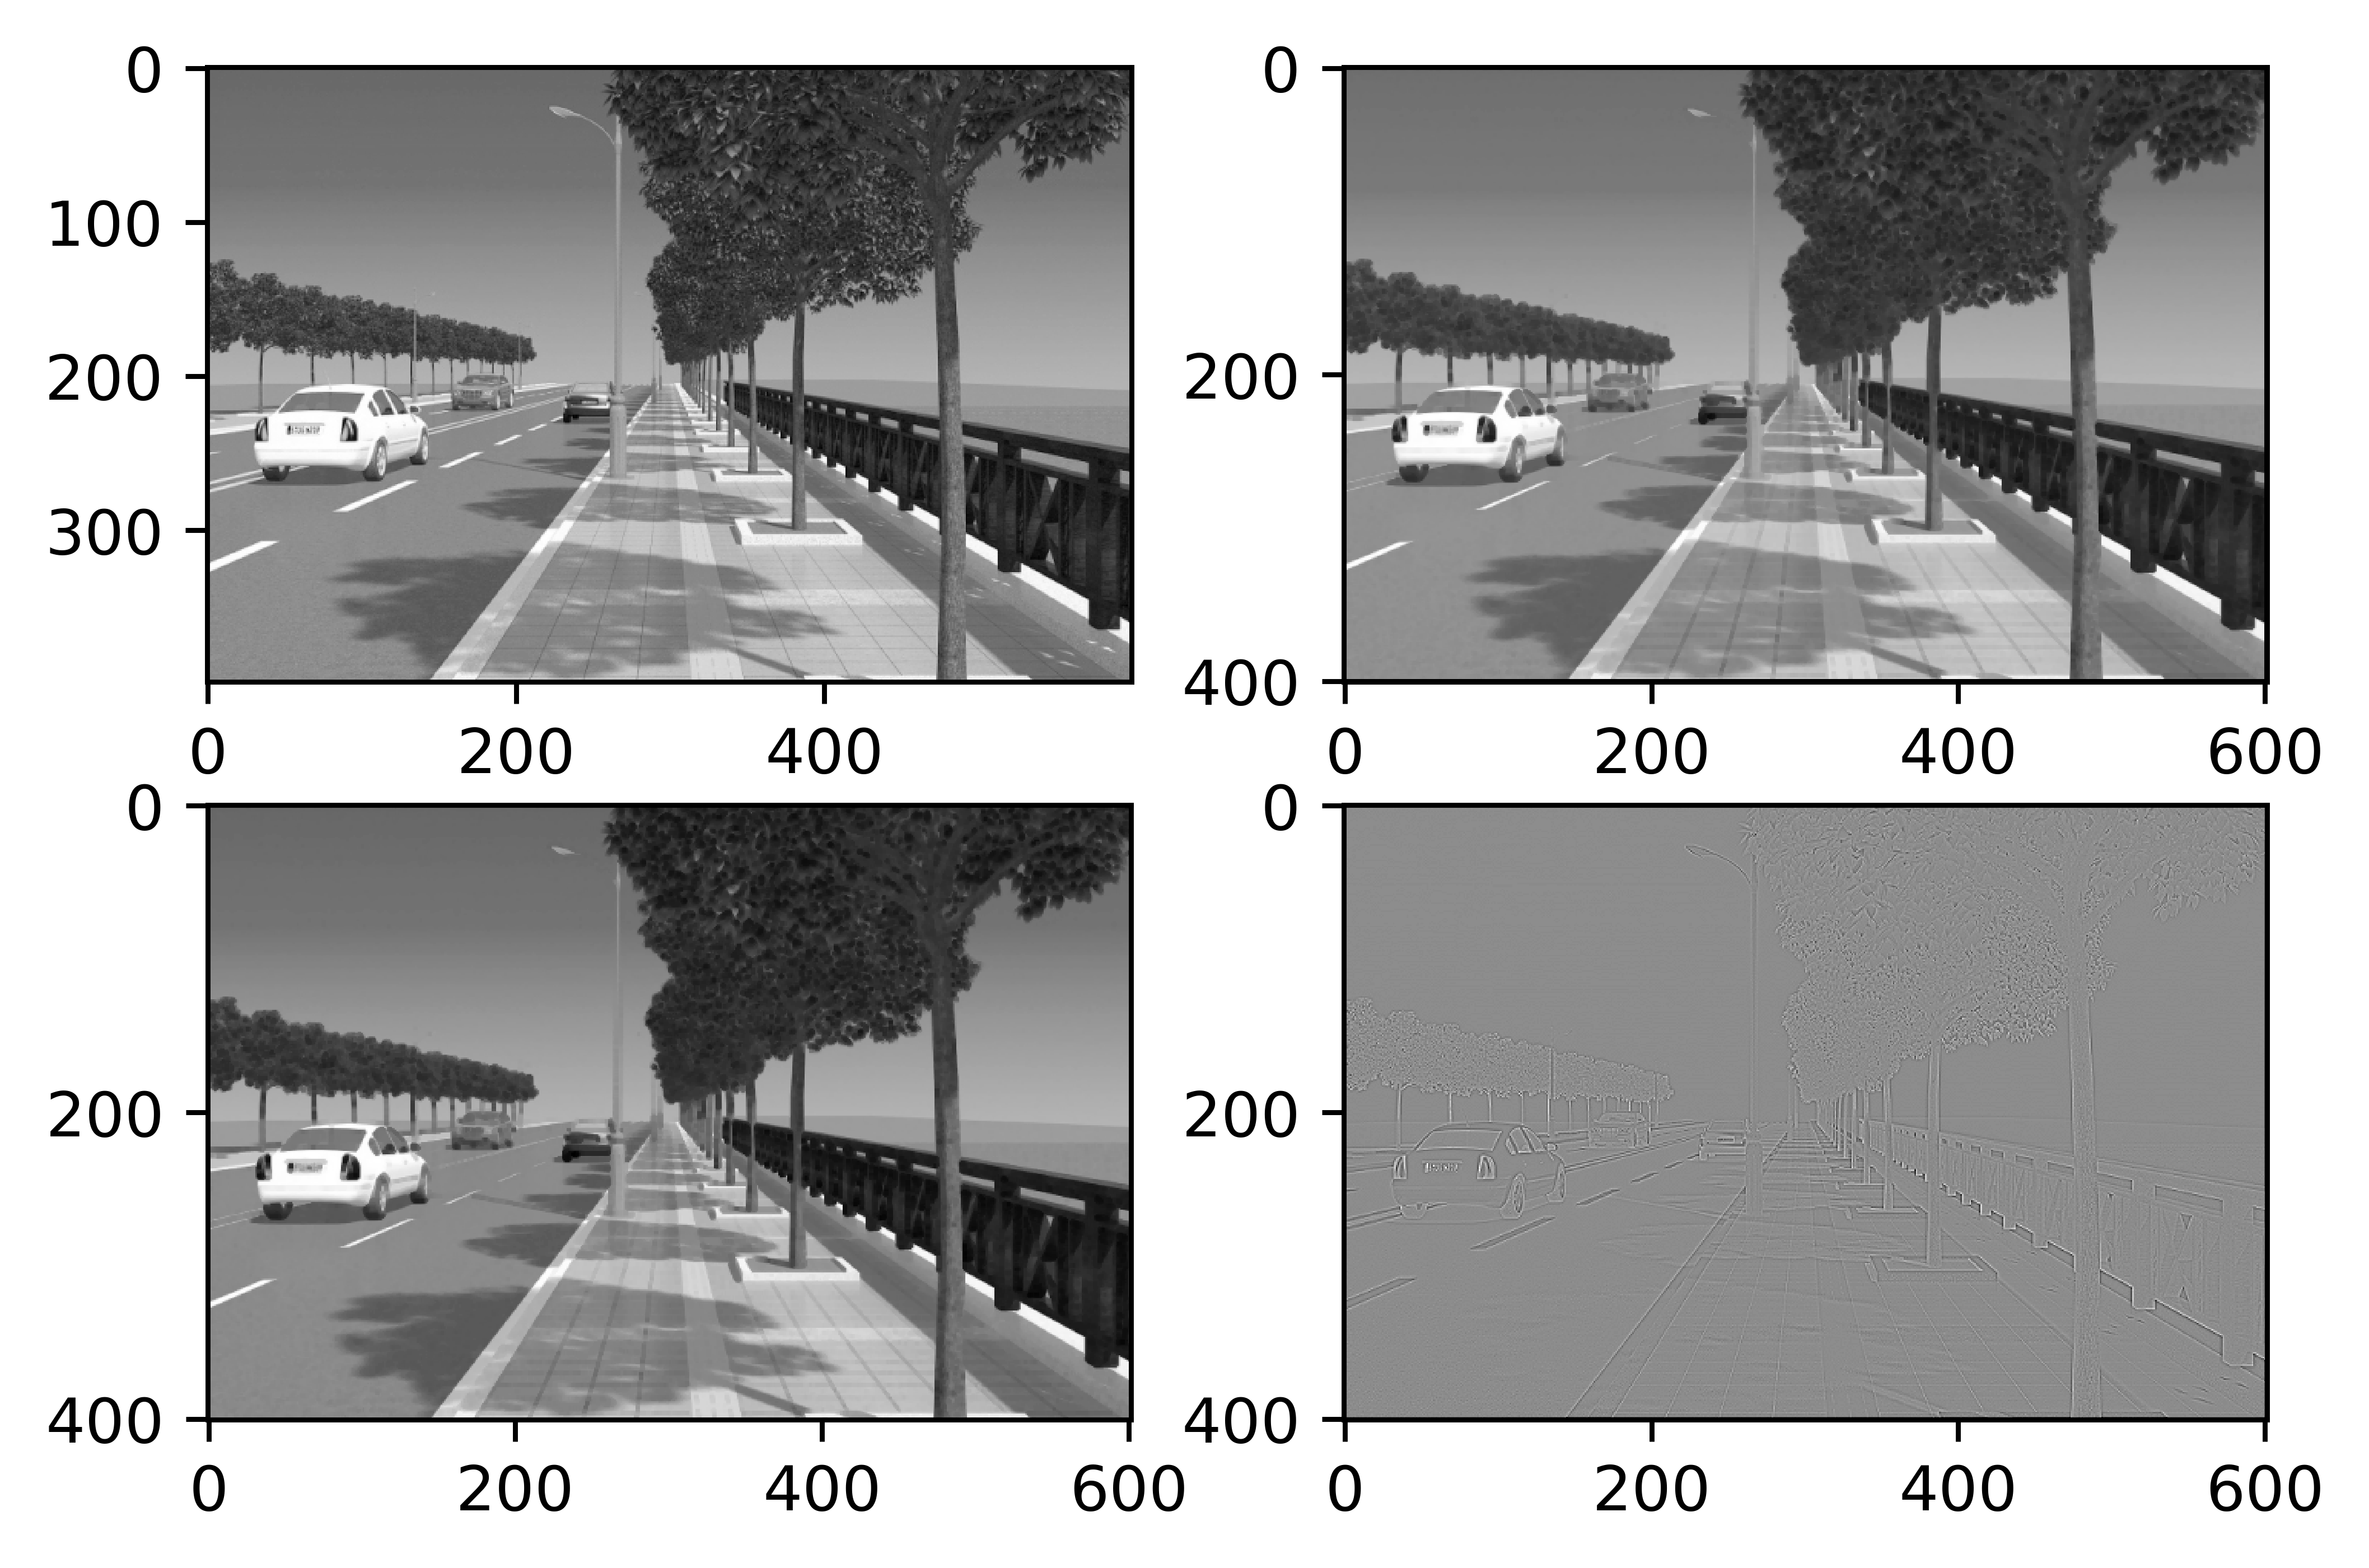

In [189]:
plt.figure(dpi=800)
plt.subplot(221)
plt.imshow(img_gray, cmap='gray')

plt.subplot(222)
plt.imshow(img_medi1, cmap='gray')

plt.subplot(223)
plt.imshow(np.array(img_medi2).astype(np.int16), cmap='gray')

plt.subplot(224)
plt.imshow(img_conv, cmap='gray')